In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

# Extract `profile.csv` from stats

## Functions

In [2]:
def extract_profile(stats_path, duration, fluctuation_threshold, mode):
    stats = pd.read_csv(stats_path)
    stats_dds = stats[stats['mode'] == mode]
    bandwidth_f1 = stats_dds.sort_values(by=['total-size'])

    # Byte -> bit -> Kbit -> Kbps
    bandwidth_f1['bandwidth'] = bandwidth_f1['total-size'] * 8 / 1024 / duration

    # # Remove bad performance fluctuation
    # for index, row in bandwidth_f1.iterrows():

    bandwidth_f1_remove_fluc = bandwidth_f1.copy()

    num_row = bandwidth_f1.shape[0]

    for i in range(1, num_row):
        j = i
        while (bandwidth_f1.iloc[j].F1 - bandwidth_f1.iloc[i-1].F1 < -fluctuation_threshold):
            try:
                bandwidth_f1_remove_fluc = bandwidth_f1_remove_fluc.drop(bandwidth_f1.iloc[j].name)
            except:
                pass
            j += 1
            if (j >= num_row):
                break
    
    return bandwidth_f1_remove_fluc

## Playground

In [3]:
profile = extract_profile(stats_path="../stats", duration=0.2, fluctuation_threshold=0, mode="emulation")
profile

,video-name,low-resolution,high-resolution,low_qp,high_qp,batch-size,low-threshold,high-threshold,tracker-length,TP,FP,FN,F1,low-size,high-size,total-size,frames,bandwidth-limit,mode,bandwidth
51,results/rene-5-18_dds_0.1_0.8_40_32_0.0_twosid...,0.1,0.8,40,32,5,0.3,0.8,4,3,0,112,0.051,3547,12056,15603,5,-1,emulation,609.492188
98,results/rene-5-18_dds_0.1_0.8_40_30_0.0_twosid...,0.1,0.8,40,30,5,0.3,0.8,4,3,0,112,0.051,3547,14311,17858,5,-1,emulation,697.578125
26,results/rene-5-18_dds_0.1_1.0_40_32_0.0_twosid...,0.1,1.0,40,32,5,0.3,0.8,4,4,0,111,0.067,3547,14616,18163,5,-1,emulation,709.492188
73,results/rene-5-18_dds_0.1_1.0_40_30_0.0_twosid...,0.1,1.0,40,30,5,0.3,0.8,4,4,0,111,0.067,3547,17387,20934,5,-1,emulation,817.734375
121,results/rene-5-18_dds_0.1_1.0_40_28_0.0_twosid...,0.1,1.0,40,28,5,0.3,0.8,4,4,0,111,0.067,3547,20909,24456,5,-1,emulation,955.312500
169,results/rene-5-18_dds_0.1_1.0_40_26_0.0_twosid...,0.1,1.0,40,26,5,0.3,0.8,4,4,0,111,0.067,3547,25215,28762,5,-1,emulation,1123.515625
56,results/rene-5-18_dds_0.1_0.8_36_32_0.0_twosid...,0.1,0.8,36,32,5,0.3,0.8,4,5,1,110,0.083,4517,26647,31164,5,-1,emulation,1217.343750
52,results/rene-5-18_dds_0.3_0.8_40_32_0.0_twosid...,0.3,0.8,40,32,5,0.3,0.8,4,27,20,89,0.331,13553,21465,35018,5,-1,emulation,1367.890625
99,results/rene-5-18_dds_0.3_0.8_40_30_0.0_twosid...,0.3,0.8,40,30,5,0.3,0.8,4,35,14,78,0.432,13553,25265,38818,5,-1,emulation,1516.328125
100,results/rene-5-18_dds_0.5_0.8_40_30_0.0_twosid...,0.5,0.8,40,30,5,0.3,0.8,4,39,11,72,0.484,25918,24578,50496,5,-1,emulation,1972.500000


In [4]:
profile.to_csv("profile-1.csv")

# Plot profile

## Functions

In [14]:
def F1_Bandwidth_plot(bandwidth_f1, label):
    # set figure size
    plt.figure(figsize=(12,6), dpi=80)

    plt.xlabel('Bandwidth (Kbps)')
    plt.ylabel('F1 Score')

    rene = plt.plot(bandwidth_f1['bandwidth'], bandwidth_f1['F1'],
    'o-',
    label = label,)

    # y-axis percentage
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.ticklabel_format(style='plain', axis='x', )

    plt.legend()

    plt.savefig('F1-Bandwidth.png', dpi=300)

In [6]:
def F1_Bandwidth_limit_plot_compare(bandwidth_f1_1, label1, bandwidth_f1_2, label2):
    # set figure size
    plt.figure(figsize=(12,6), dpi=80)

    plt.xlabel('Bandwidth Limit (Kbps)')
    plt.ylabel('F1 Score')

    plt1 = plt.plot(bandwidth_f1_1['bandwidth-limit'], bandwidth_f1_1['F1'],
    'o-',
    label = label1,)
    plt2 = plt.plot(bandwidth_f1_2['bandwidth-limit'], bandwidth_f1_2['F1'],
    'o-',
    label = label2,)

    # y-axis percentage
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.ticklabel_format(style='plain', axis='x', )

    plt.legend()

## Playground

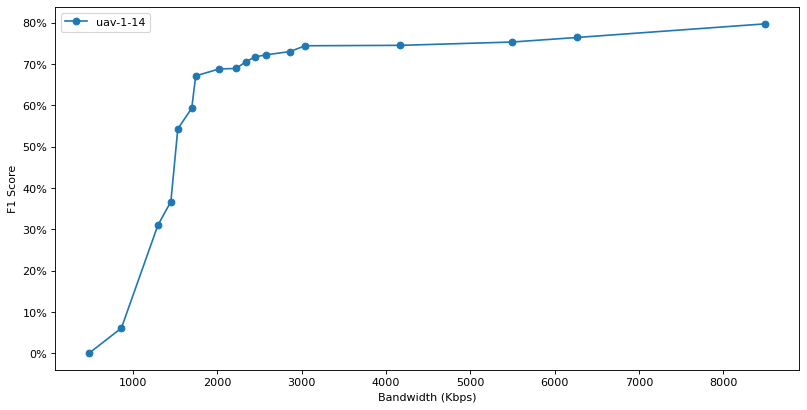

In [19]:
profile = pd.read_csv("profile-14.csv")
F1_Bandwidth_plot(profile, "uav-1-14")
# F1_Bandwidth_limit_plot_compare(profile, "Rene", profile_rene_adaptive_separated, "Rene-Separated")

In [8]:
len(profile_rene.index)

NameError: name 'profile_rene' is not defined

In [ ]:
len(profile_rene_adaptive.index)
# profile_rene_adaptive

44